<a href="https://colab.research.google.com/github/sauravsingla/Time_Series/blob/master/Time_Series_Share_Forecast_Stocker_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U quandl numpy pandas fbprophet matplotlib pytrends pystan

    100% |████████████████████████████████| 17.3MB 1.8MB/s 
    100% |████████████████████████████████| 10.1MB 4.9MB/s 
Requirement already up-to-date: fbprophet in /usr/local/lib/python3.6/dist-packages (0.4.post2)
Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (3.0.2)
Requirement already up-to-date: pystan in /usr/local/lib/python3.6/dist-packages (2.18.1.0)
  Stored in directory: /root/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
thinc 6.12.1 has requirement wrapt<1.11.0,>=1.10.0, but you'll have wrapt 1.11.1 which is incompatible.
pymc3 3.6 has requirement joblib<0.13.0, but you'll have joblib 0.13.2 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uni

In [ ]:
from stocker import Stocker

In [ ]:
# TECHM is in the NSE database
amazon = Stocker(ticker='TCS', exchange='NSE')

TCS Stocker Initialized. Data covers 2004-08-25 to 2019-01-04.


In [ ]:
#amazon = Stocker('AMZN')

Maximum Adj. Close = 3603.70 on 2018-05-24.
Minimum Adj. Close = 366.65 on 2009-06-23.
Current Adj. Close = 1876.85 on 2019-01-04.



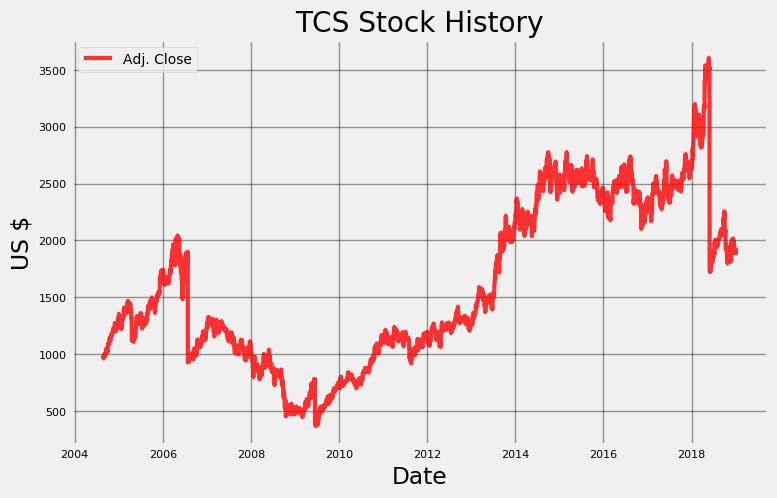

In [ ]:
amazon.plot_stock()

Maximum Daily Change = 155.40 on 2018-01-22.
Minimum Daily Change = -210.75 on 2004-08-25.
Current Daily Change = -23.15 on 2019-01-04.



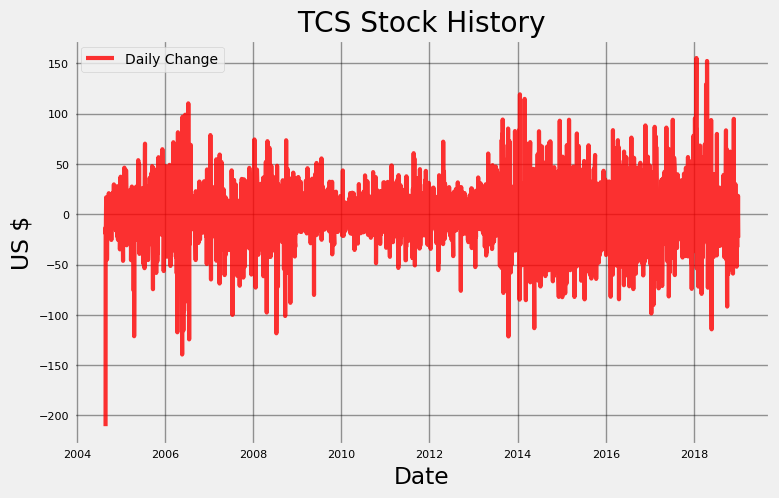

In [ ]:

amazon.plot_stock(stats=['Daily Change'])

Predicted Price on 2019-04-04 = $1613.40


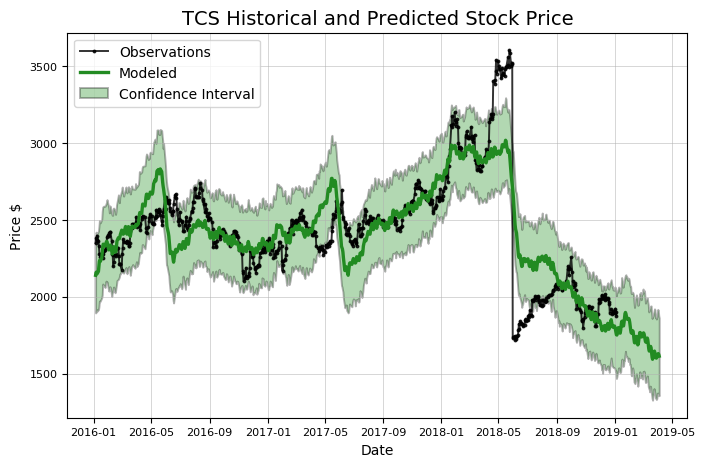

In [ ]:
# predict days into the future
model, model_data = amazon.create_prophet_model(days=90)

In [ ]:
# Variables assigned from previous method call
model.plot_components(model_data)
plt.show()

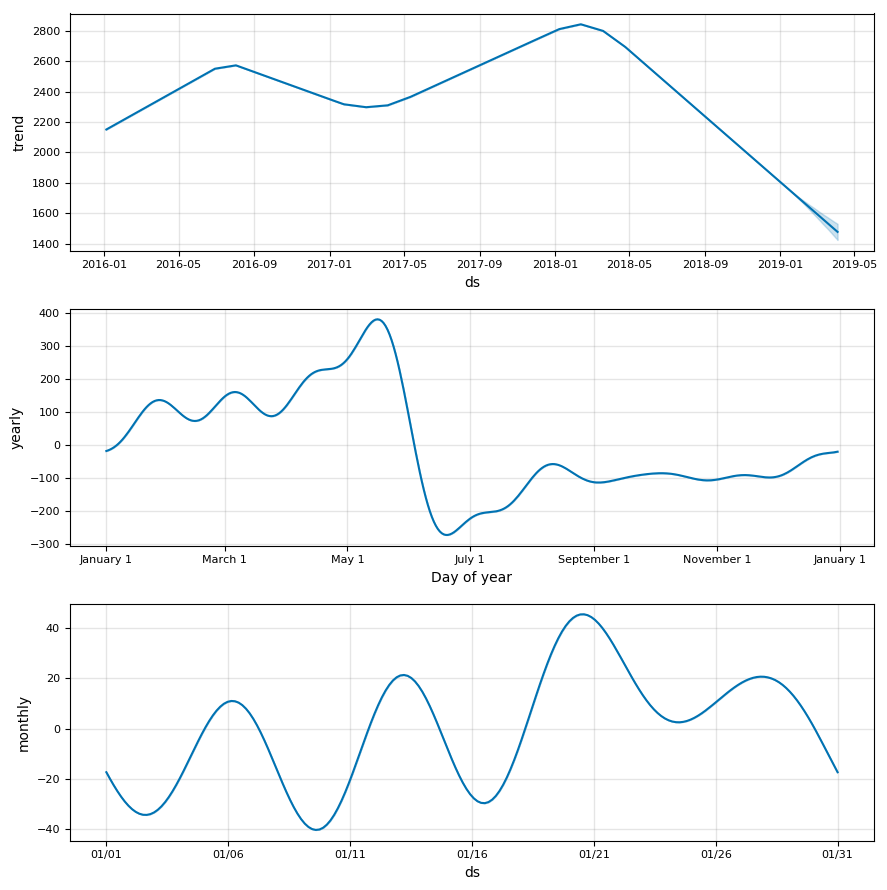

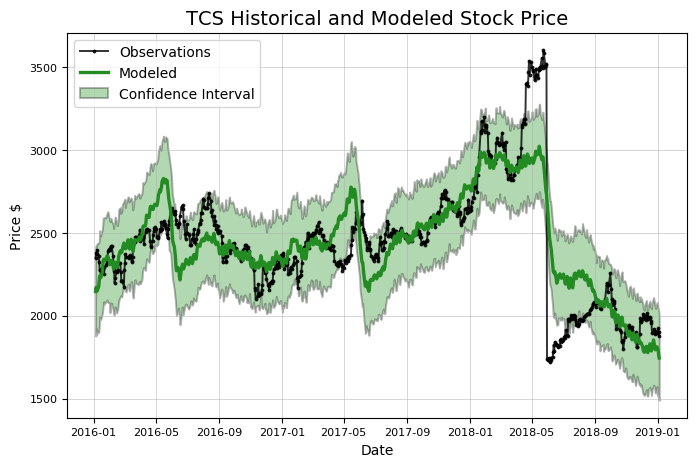

In [ ]:
amazon.weekly_seasonality=True
model, model_data = amazon.create_prophet_model()

In [ ]:
model.plot_components(model_data)
plt.show()

Predicted Price on 2019-04-04 = $1601.84


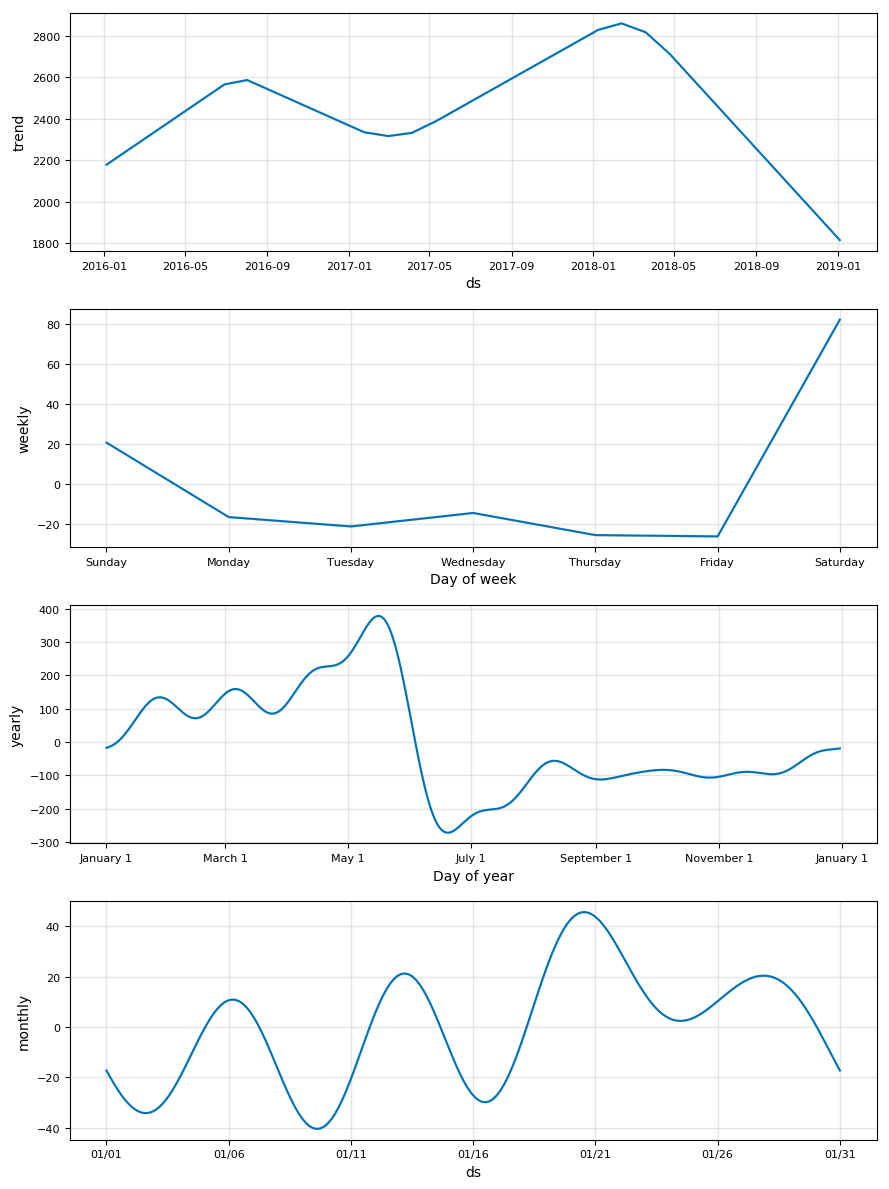

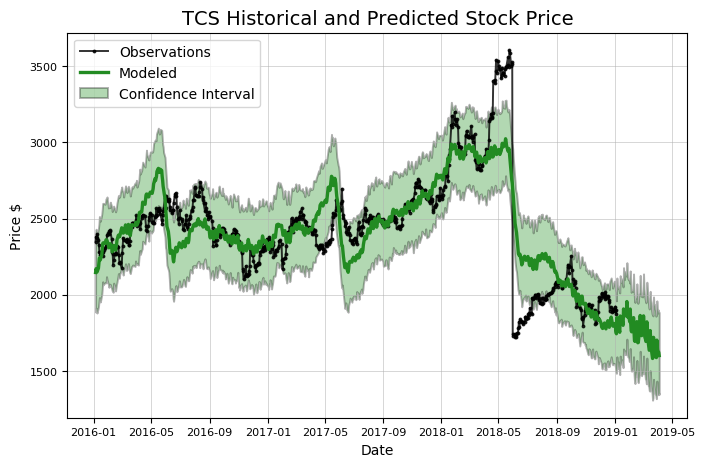

In [ ]:

model, model_data = amazon.create_prophet_model(days=90)


Prediction Range: 2018-01-04 to 2019-01-04.

Predicted price on 2019-01-03 = $3190.10.
Actual price on    2019-01-03 = $1899.95.

Average Absolute Error on Training Data = $47.21.
Average Absolute Error on Testing  Data = $765.68.

When the model predicted an increase, the price increased 52.00% of the time.
When the model predicted a  decrease, the price decreased  44.17% of the time.

The actual value was within the 80% confidence interval 9.76% of the time.


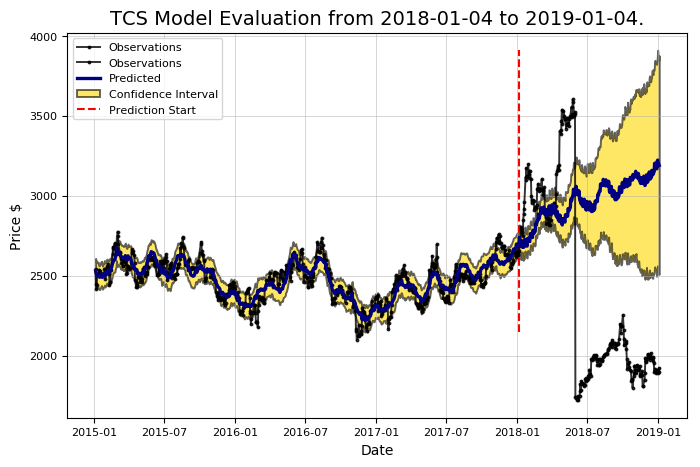

In [ ]:
amazon.evaluate_prediction()

In [ ]:
amazon.weekly_seasonality=False

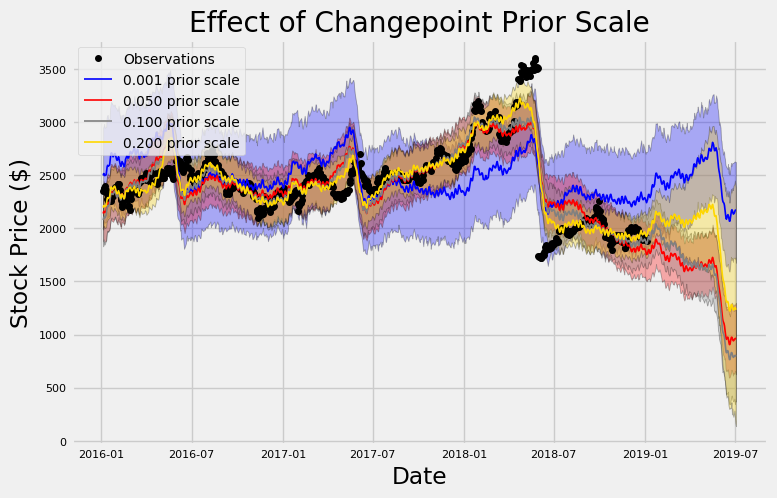

In [ ]:
# changepoint priors is the list of changepoints to evaluate
amazon.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])


Validation Range 2016-01-04 to 2017-01-03.

     cps   train_err  train_range    test_err   test_range
0  0.001  156.535356   461.094208  672.275096   460.848934
1  0.050   49.948513   159.883787  336.487040   329.595488
2  0.100   45.044745   145.766233  358.554477   650.971728
3  0.200   41.372307   135.602441  275.657546  1136.248229


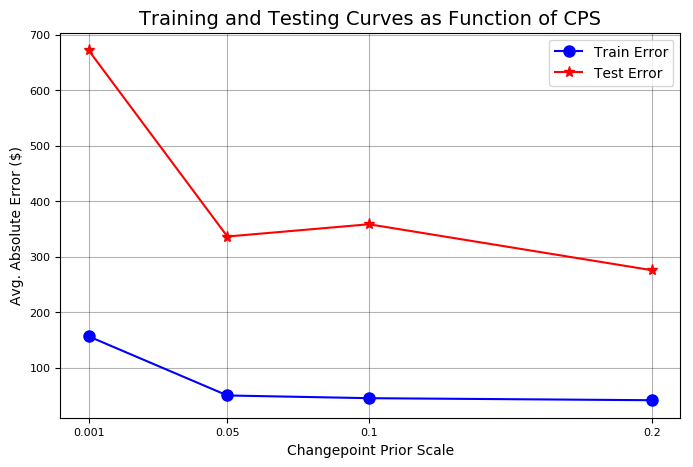

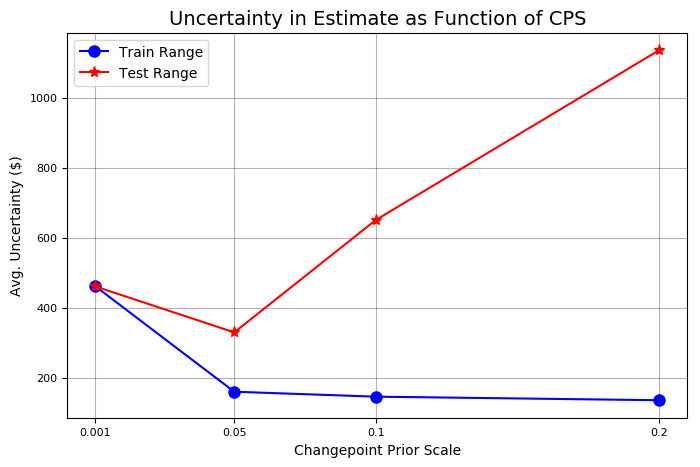

In [ ]:
amazon.changepoint_prior_validation(start_date='2016-01-04', end_date='2017-01-03', changepoint_priors=[0.001, 0.05, 0.1, 0.2])


Validation Range 2016-01-04 to 2017-01-03.

    cps  train_err  train_range    test_err   test_range
0  0.15  42.888933   140.012692  311.034078   918.483174
1  0.20  41.372307   135.319232  275.657546  1291.597204
2  0.25  40.333842   132.458118  234.714425  1538.584876
3  0.40  36.843897   122.424373  237.435722  2991.906466
4  0.50  36.107237   120.187460  204.242336  3488.083938
5  0.60  35.546424   118.456610  212.183502  3867.624494


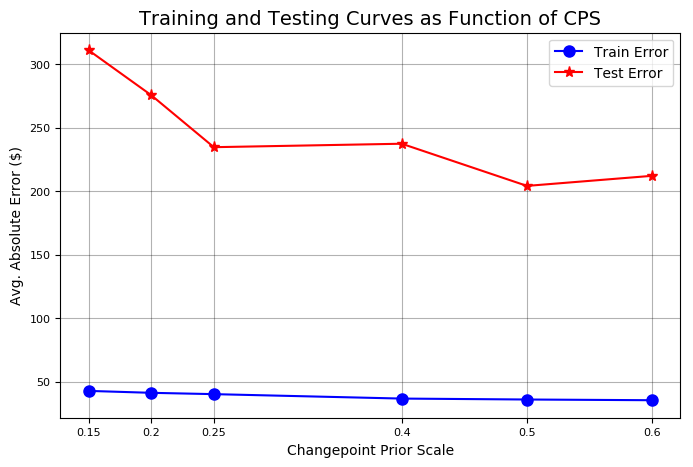

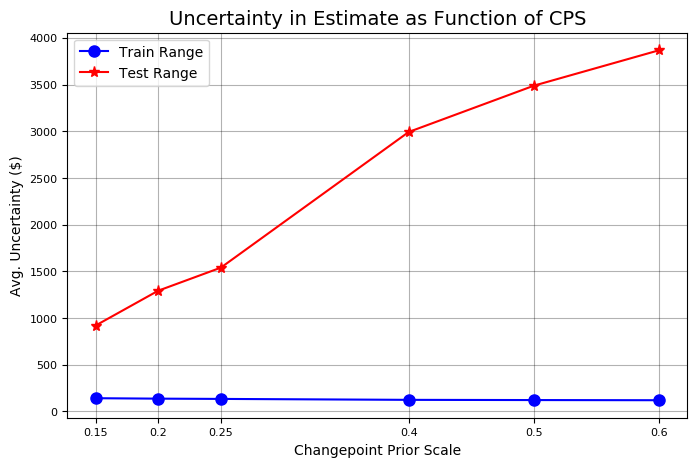

In [ ]:
# test more changepoint priors on same validation range
amazon.changepoint_prior_validation(start_date='2016-01-04', end_date='2017-01-03', changepoint_priors=[0.15, 0.2, 0.25,0.4, 0.5, 0.6])

In [ ]:
amazon.changepoint_prior_scale = 0.5


Prediction Range: 2018-01-04 to 2019-01-04.

Predicted price on 2019-01-03 = $2074.67.
Actual price on    2019-01-03 = $1899.95.

Average Absolute Error on Training Data = $36.65.
Average Absolute Error on Testing  Data = $395.67.

When the model predicted an increase, the price increased 49.50% of the time.
When the model predicted a  decrease, the price decreased  43.06% of the time.

The actual value was within the 80% confidence interval 60.57% of the time.


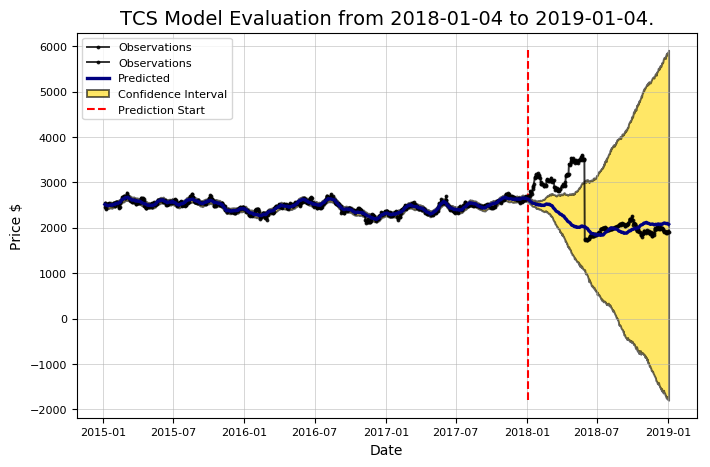

In [ ]:
amazon.evaluate_prediction()

/content/Data-Analysis/stocker/stocker.py:613: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test_pred_increase['pred_profit'] = prediction_profit


You played the stock market in TCS from 2018-01-04 to 2019-01-04 with 1000 shares.

When the model predicted an increase, the price increased 49.50% of the time.
When the model predicted a  decrease, the price decreased  43.06% of the time.

The total profit using the Prophet model = $-1472800.00.
The Buy and Hold strategy profit =         $-757150.00.

Thanks for playing the stock market!



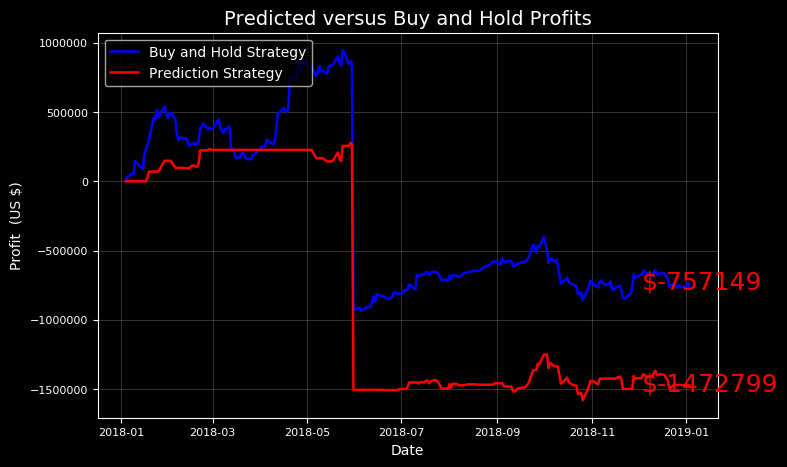

In [ ]:
# Going big 
amazon.evaluate_prediction(nshares=1000)

/content/Data-Analysis/stocker/stocker.py:613: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  test_pred_increase['pred_profit'] = prediction_profit


You played the stock market in TCS from 2008-01-03 to 2009-01-05 with 1000 shares.

When the model predicted an increase, the price increased 43.24% of the time.
When the model predicted a  decrease, the price decreased  51.13% of the time.

The total profit using the Prophet model = $-414050.00.
The Buy and Hold strategy profit =         $-514200.00.

Thanks for playing the stock market!



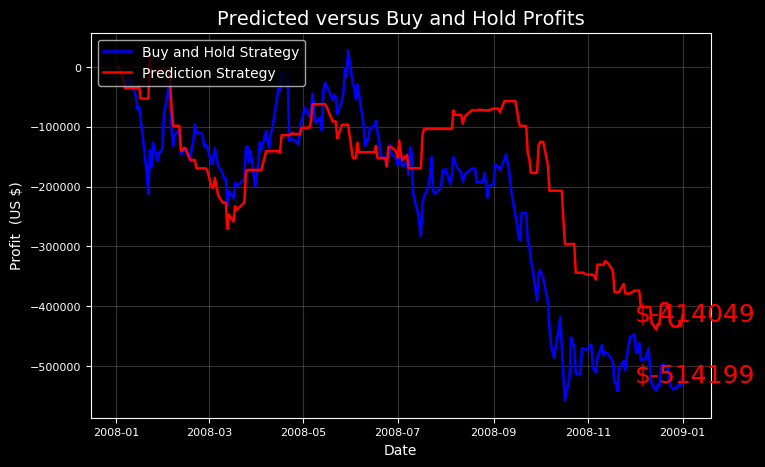

In [ ]:
amazon.evaluate_prediction(start_date = '2008-01-03', end_date = '2009-01-05', nshares=1000)


Predicted Increase: 

         Date     estimate     change        upper        lower
2  2019-01-06  1917.239001   9.979783  2087.696788  1747.278242
3  2019-01-07  1931.899053  14.660052  2093.746481  1778.824823
4  2019-01-08  1946.570143  14.671090  2101.430054  1778.246397
5  2019-01-09  1953.926601   7.356458  2119.461652  1781.564979
9  2019-01-13  1953.832207   9.346502  2118.561750  1783.141603
10 2019-01-14  1973.986902  20.154695  2160.085430  1801.938959
11 2019-01-15  1993.361124  19.374221  2180.915351  1825.569102
12 2019-01-16  2002.584551   9.223427  2176.943442  1842.668190
16 2019-01-20  2022.744474  24.902560  2204.649511  1850.882461
17 2019-01-21  2048.206100  25.461626  2229.671050  1863.334873
18 2019-01-22  2068.553909  20.347809  2238.333449  1893.957979
19 2019-01-23  2076.126801   7.572892  2276.559821  1892.026199
24 2019-01-28  2062.880525   0.833187  2256.052500  1876.565881

Predicted Decrease: 

         Date     estimate     change        upper        

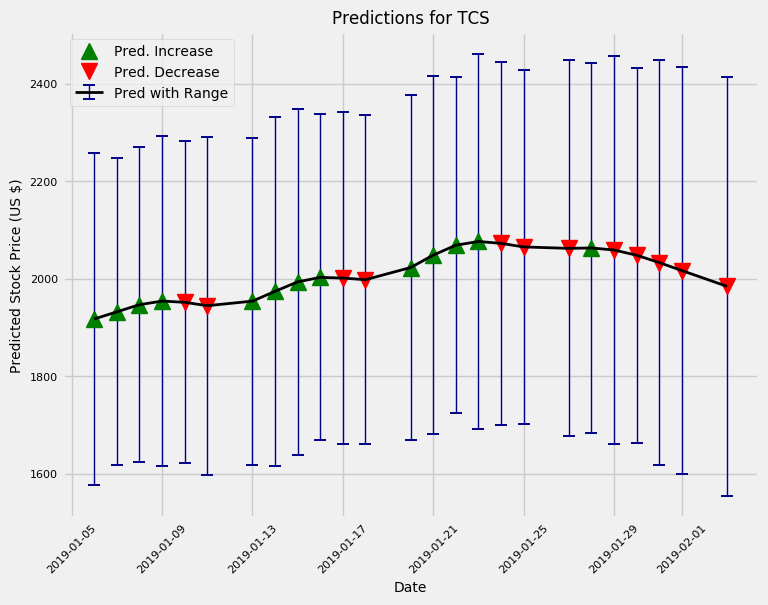


Predicted Increase: 

         Date     estimate     change        upper        lower
2  2019-01-06  1917.239001   9.979783  2082.915461  1748.471427
3  2019-01-07  1931.899053  14.660052  2102.478242  1766.158369
4  2019-01-08  1946.570143  14.671090  2117.778914  1786.885472
5  2019-01-09  1953.926601   7.356458  2110.283090  1793.512901
9  2019-01-13  1953.832207   9.346502  2126.212988  1786.642597
10 2019-01-14  1973.986902  20.154695  2146.139016  1807.390300
11 2019-01-15  1993.361124  19.374221  2176.944464  1837.036608
12 2019-01-16  2002.584551   9.223427  2168.577945  1828.064111
16 2019-01-20  2022.744474  24.902560  2205.688843  1855.843065
17 2019-01-21  2048.206100  25.461626  2221.170829  1866.319879
18 2019-01-22  2068.553909  20.347809  2243.628962  1889.822002
19 2019-01-23  2076.126801   7.572892  2263.733326  1906.615363
24 2019-01-28  2062.880525   0.833187  2256.917212  1868.459041
34 2019-02-07  1960.173561   0.360099  2174.883814  1737.358109
40 2019-02-13  18

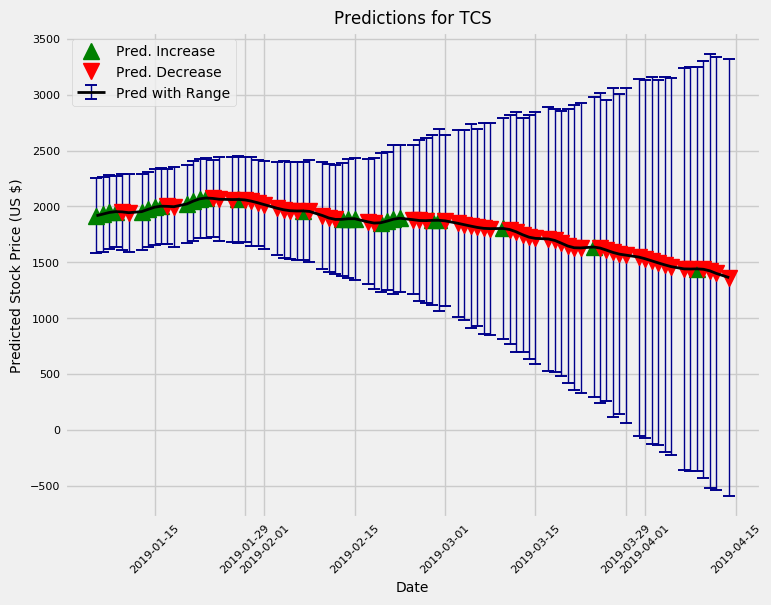

In [ ]:
amazon.predict_future(days=30)
amazon.predict_future(days=100)

In [ ]:
microsoft = Stocker('MSFT')

MSFT Stocker Initialized. Data covers 1986-03-13 to 2018-03-27.


In [ ]:
# Command for plotting in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
microsoft = Stocker('MSFT')

MSFT Stocker Initialized. Data covers 1986-03-13 to 2018-03-27.


In [ ]:
stock_history = microsoft.stock
stock_history.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,ds,y,Daily Change
0,1986-03-13,25.50,29.25,25.5,28.00,3582600.0,0.0,1.0,0.058941,0.067609,0.058941,0.064720,1.031789e+09,1986-03-13,0.064720,0.005779
1,1986-03-14,28.00,29.50,28.0,29.00,1070000.0,0.0,1.0,0.064720,0.068187,0.064720,0.067031,3.081600e+08,1986-03-14,0.067031,0.002311
2,1986-03-17,29.00,29.75,29.0,29.50,462400.0,0.0,1.0,0.067031,0.068765,0.067031,0.068187,1.331712e+08,1986-03-17,0.068187,0.001156
3,1986-03-18,29.50,29.75,28.5,28.75,235300.0,0.0,1.0,0.068187,0.068765,0.065876,0.066454,6.776640e+07,1986-03-18,0.066454,-0.001734
4,1986-03-19,28.75,29.00,28.0,28.25,166300.0,0.0,1.0,0.066454,0.067031,0.064720,0.065298,4.789440e+07,1986-03-19,0.065298,-0.001156


Maximum Adj. Close = 96.77 on 2018-03-12.
Minimum Adj. Close = 0.06 on 1986-03-24.
Current Adj. Close = 89.47 on 2018-03-27.



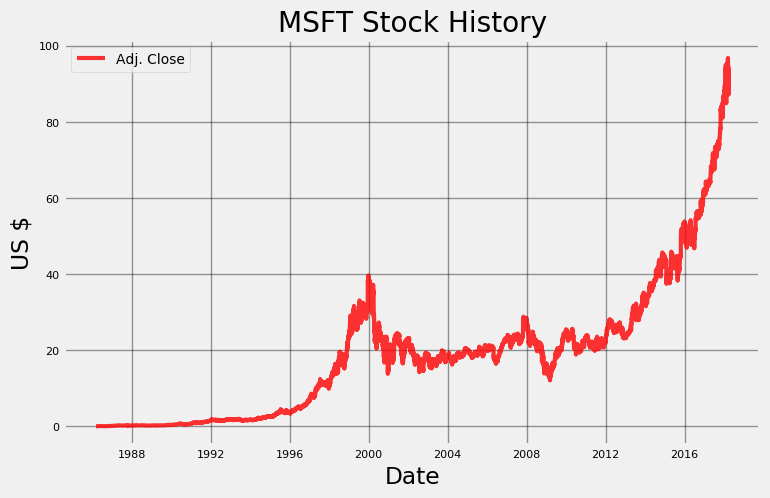

In [ ]:
microsoft.plot_stock()

Maximum Daily Change = 2.08 on 2008-10-13.
Minimum Daily Change = -3.34 on 2017-12-04.
Current Daily Change = -5.47 on 2018-03-27.

Maximum Adj. Volume = 591052200.00 on 2006-04-28.
Minimum Adj. Volume = 7425503.00 on 2017-11-24.
Current Adj. Volume = 53704562.00 on 2018-03-27.



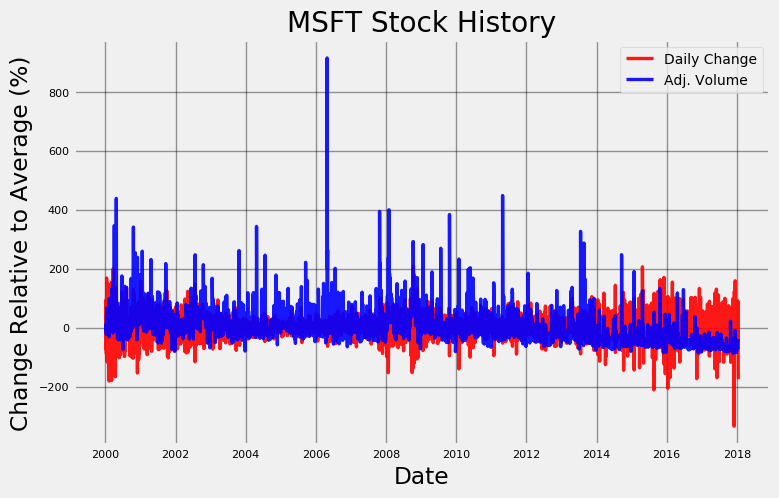

In [ ]:
microsoft.plot_stock(start_date = '2000-01-03', end_date = '2018-01-16', 
                     stats = ['Daily Change', 'Adj. Volume'], plot_type='pct')

MSFT Total buy and hold profit from 1986-03-13 to 2018-01-16 for 100 shares = $8829.11


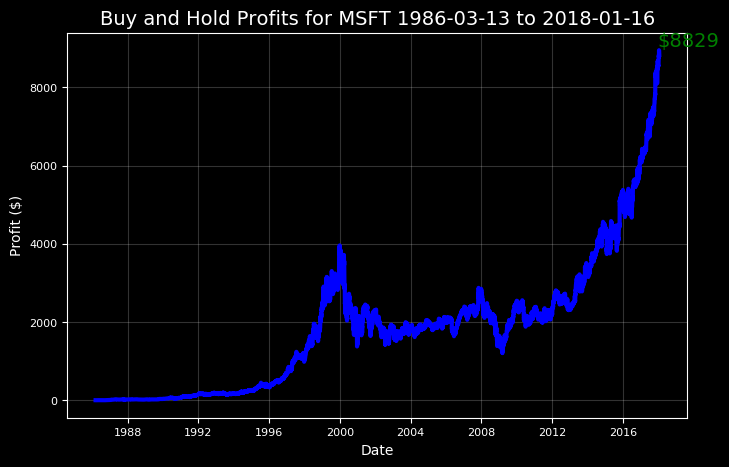

In [ ]:
microsoft.buy_and_hold(start_date='1986-03-13', end_date='2018-01-16', nshares=100)

MSFT Total buy and hold profit from 1999-01-05 to 2002-01-03 for 100 shares = $-56.92


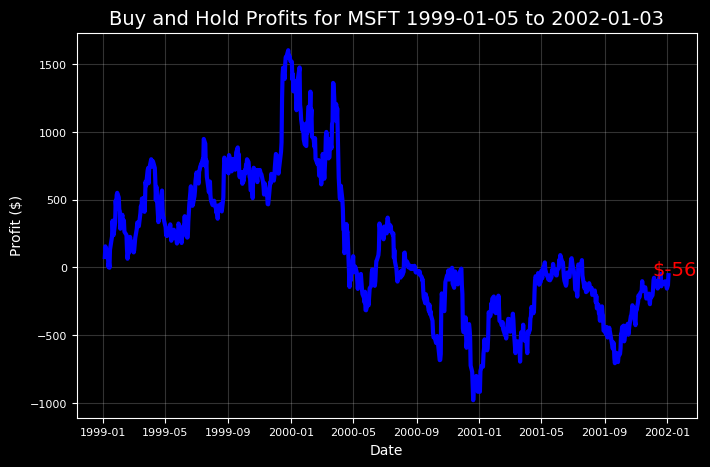

In [ ]:
microsoft.buy_and_hold(start_date='1999-01-05', end_date='2002-01-03', nshares=100)

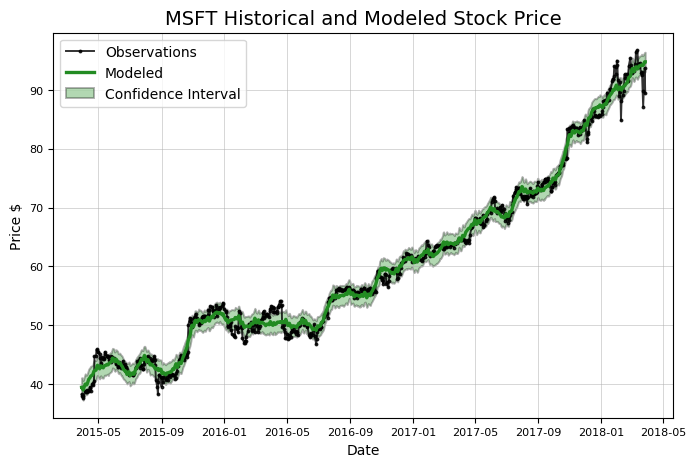

In [ ]:
model, model_data = microsoft.create_prophet_model()

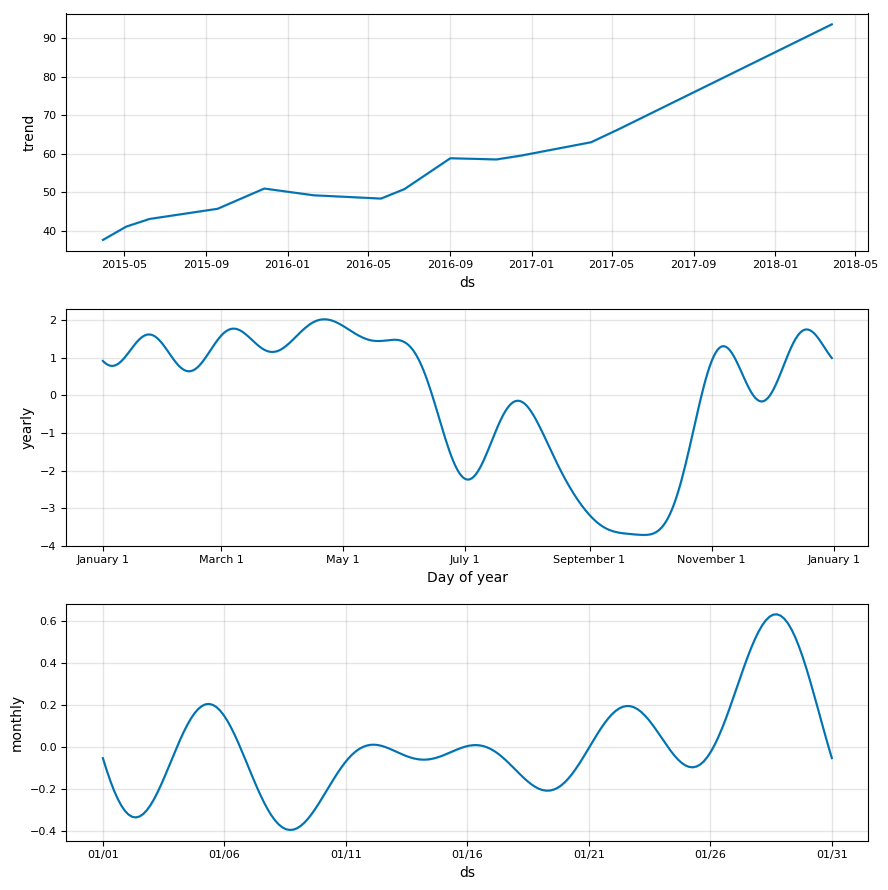

In [ ]:
model.plot_components(model_data)
plt.show()

In [ ]:
print(microsoft.weekly_seasonality)
microsoft.weekly_seasonality = True
print(microsoft.weekly_seasonality)

False
True


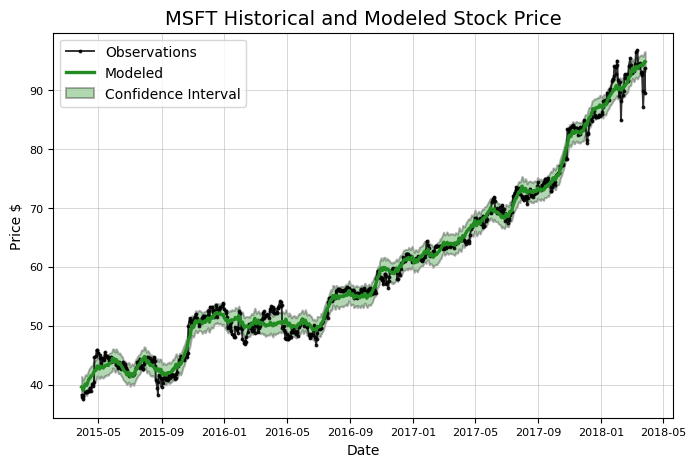

In [ ]:

model, model_data = microsoft.create_prophet_model(days=0)

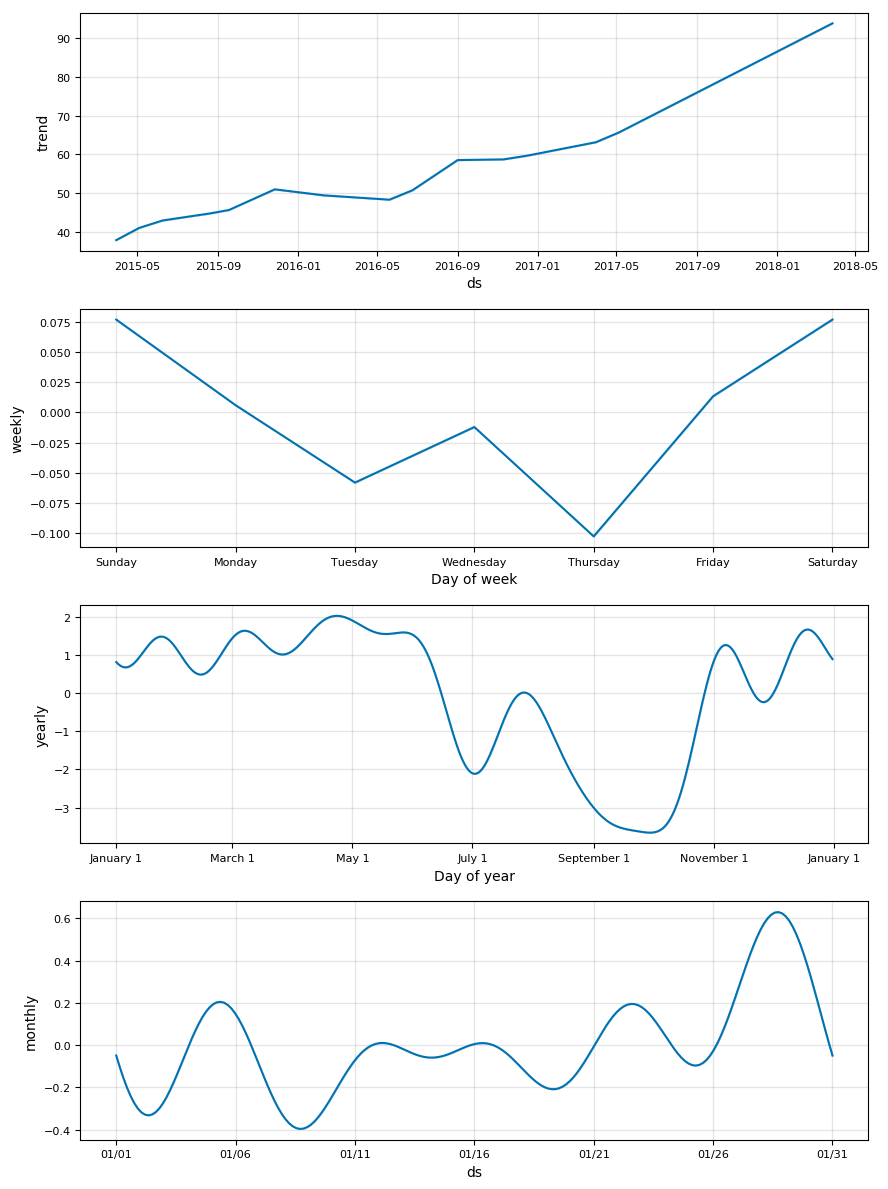

In [ ]:
model.plot_components(model_data)
plt.show()

In [ ]:
# Turn off the weekly seasonality because it clearly did not work! 
microsoft.weekly_seasonality=False


Changepoints sorted by slope rate of change (2nd derivative):

          Date  Adj. Close     delta
361 2016-09-01   55.966886 -1.363753
169 2015-11-27   51.353167 -1.115812
289 2016-05-20   48.886934  0.884024
120 2015-09-18   41.122995  0.554914
506 2017-03-31   64.816957  0.540252


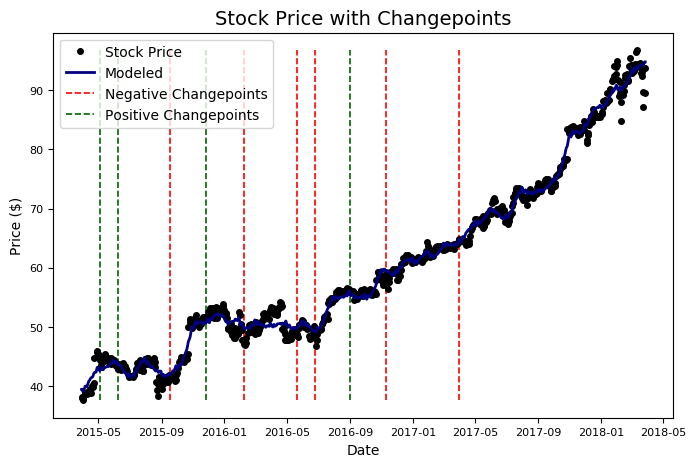

In [ ]:
microsoft.changepoint_date_analysis()

In [ ]:
microsoft.changepoint_date_analysis(search = 'Microsoft Office')

In [ ]:
microsoft.changepoint_date_analysis(search = 'Microsoft Office')

Predicted Price on 2018-09-23 = $105.09


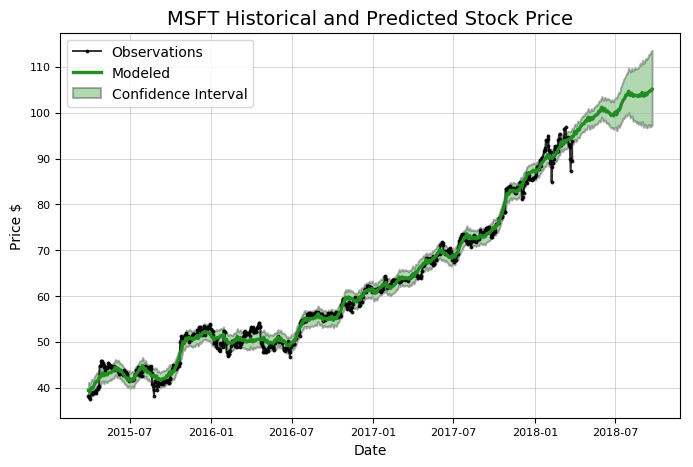

In [ ]:
model, future = microsoft.create_prophet_model(days=180)